<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

### <center>Supervised Learning - Decision Trees and Random Forests</center>
#### <center>Classification Using Decision Trees and Random Forests</center>

<center>Dr. Ahmad Al-Doulat </center>
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

<div class="alert alert-block alert-success">
    <h2 style="text-align: left">Classification Using Decision Trees</h2>
</div>

### Dataset Description
<hr style="border:1px solid orange"> </hr>

**The dataset includes 13 independent variables and 1 dependent variable, as follows:**

- **Independent Variables**  
    
1. **age**: age in years 
2. **sex**: sex (1 = male; 0 = female)
3. **cp**: chest pain type
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment
    - 0: upsloping
    - 1: flat
    - 2: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: 
    - 0 = normal 
    - 1 = fixed defect
    - 2 = reversible defect

- **Dependent Variables**  
    - **hd**: Heart Disease: Has Heart Disease (**1**) or Does not have Heart Disease (**0**)

### Example: Heart Disease Classification  

**Process:**
1. read the dataset
2. preprocess the dataset
3. split the dataset into training and testing sets
4. train the decision tree model
5. predict the class for the test set 
6. evaluate the model
7. tune the model

### 1. Reading the dataset
<hr style="border:1px solid orange"> </hr>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
dataset = pd.read_csv('Heart Disease.csv')
dataset.shape

(303, 14)

In [3]:
dataset.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
dataset.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [5]:
dataset['hd'].value_counts()

0    164
1    139
Name: hd, dtype: int64

In [6]:
dataset.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

### 2. Dataset Preprocessing 

<hr style="border:1px solid orange"> </hr>

Find all columns that have `?` as its value

In [7]:
cols_with_missing_values = dataset.loc[: , (dataset == '?').any()].columns
cols_with_missing_values

Index(['ca', 'thal'], dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [9]:
dataset['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [10]:
dataset['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [11]:
# Find rows that has ? as the value for ca field or thal field
dataset[(dataset['ca'] == '?') | (dataset['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [12]:
# Drop observation that has ? as the value for ca field or thal fields 
dataset = dataset[(dataset['ca'] != '?') & (dataset['thal'] != '?')]
dataset.shape

(297, 14)

In [13]:
# Check if there is still ?'s
cols_with_missing_values = dataset.loc[: , (dataset == '?').any()].columns
cols_with_missing_values

Index([], dtype='object')

In [14]:
dataset['ca'] = dataset['ca'].astype('float64')
dataset['thal'] = dataset['thal'].astype('float64')

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    float64
 12  thal     297 non-null    float64
 13  hd       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


#### Dataset Visualization 

In [16]:
import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

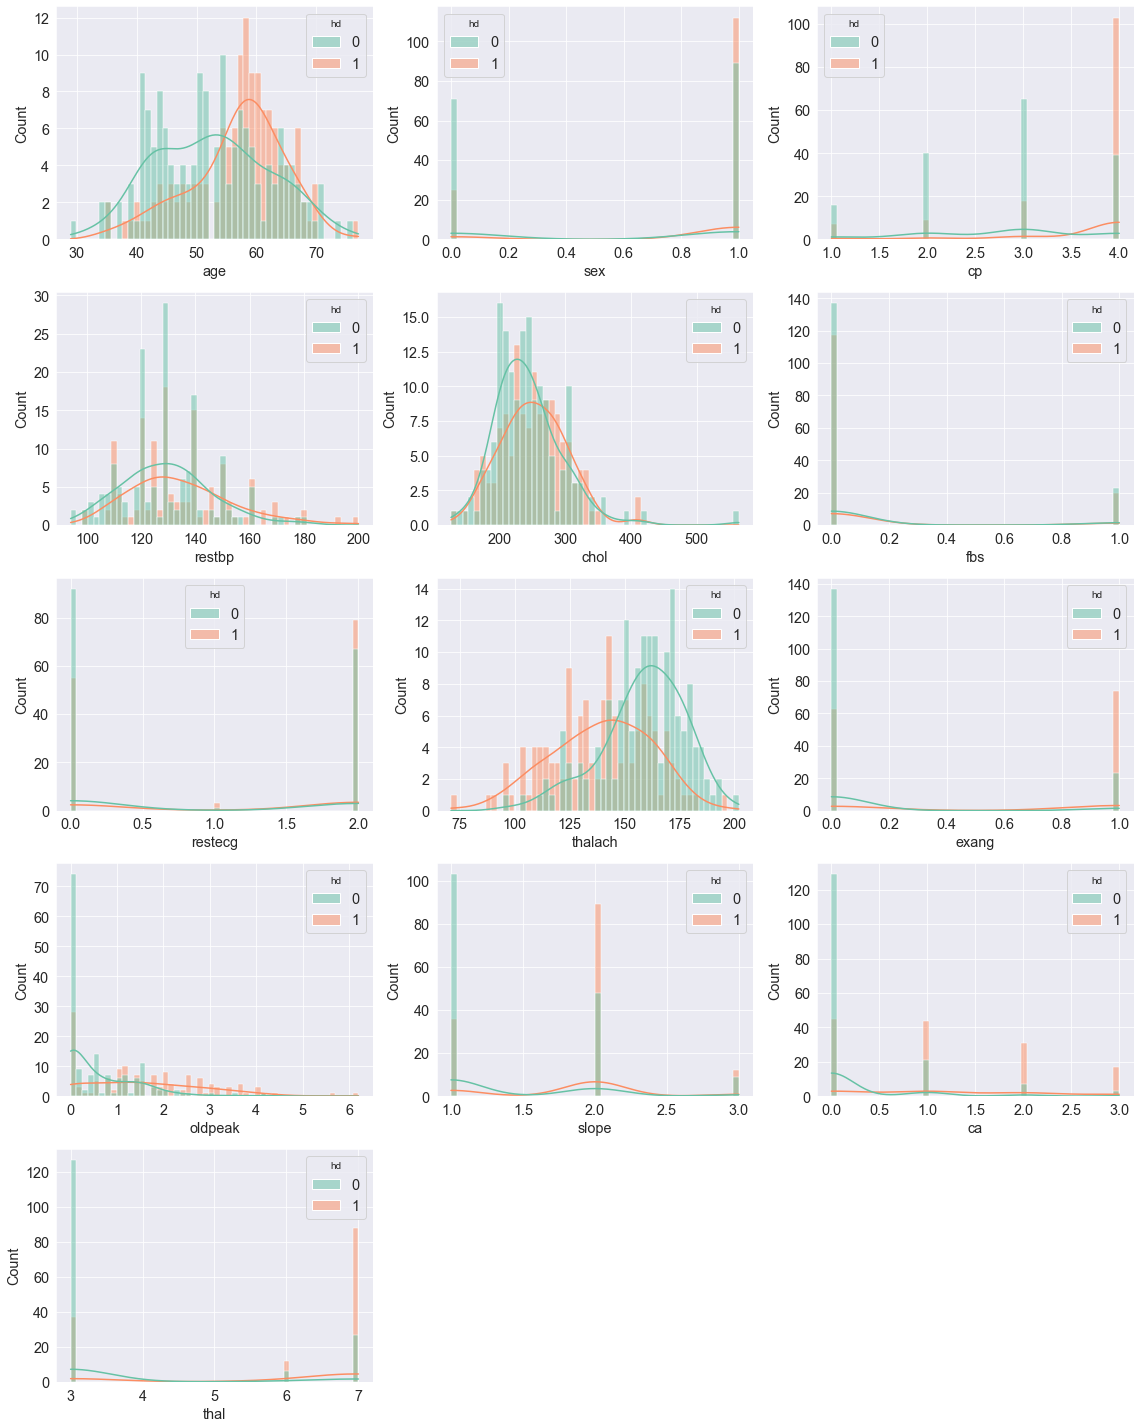

In [17]:
plt.figure(figsize=(16, 20))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('hd', axis=1).columns):
    plt.subplot(num_rows, num_cols, index+1)
    sns.histplot(dataset, x=col, hue='hd', kde=True, bins=50)
    
plt.tight_layout()

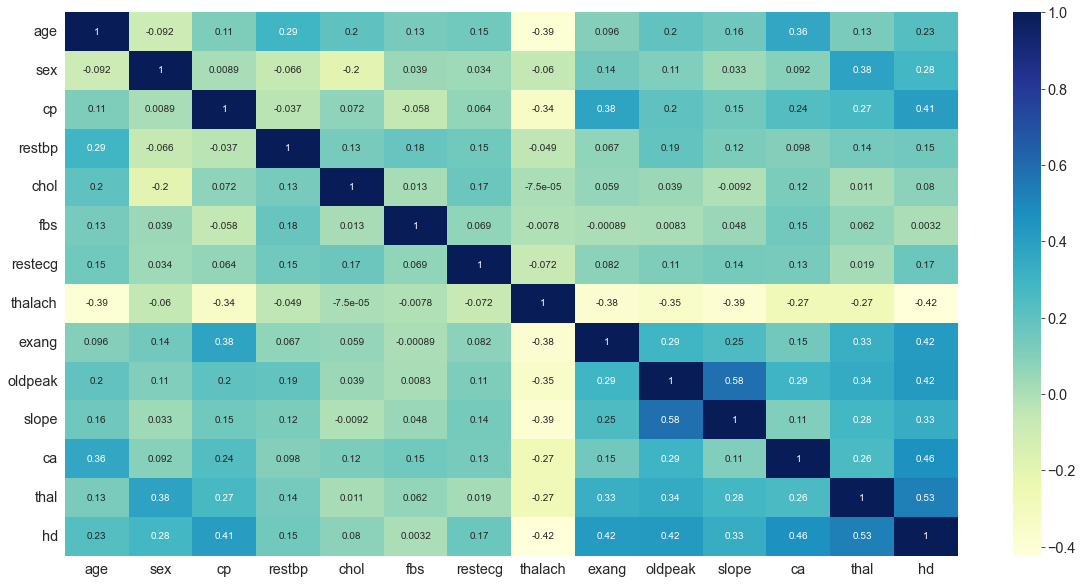

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(dataset.corr(),cmap="YlGnBu", annot=True);

### Data Encoding 

- cp: chest pain type
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic
- restecg: resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- slope: the slope of the peak exercise ST segment
    - 0: upsloping
    - 1: flat
    - 2: downsloping
- thal: 
    - 0 = normal 
    - 1 = fixed defect
    - 2 = reversible defect

In [19]:
dataset = pd.get_dummies(dataset, columns=['cp', 'restecg', 'slope', 'thal'])

#### Splitting the Dataset 

In [20]:
X = dataset.drop(['hd'], axis=1)
y = dataset.hd.values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Model Training 
<hr style="border:1px solid orange"> </hr>

In [22]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(502.63593749999995, 622.669090909091, 'ca <= 0.5\ngini = 0.499\nsamples = 237\nvalue = [124, 113]\nclass = No HD'),
 Text(325.20937499999997, 563.3672727272727, 'thal_7.0 <= 0.5\ngini = 0.384\nsamples = 139\nvalue = [103, 36]\nclass = No HD'),
 Text(207.50625, 504.0654545454546, 'oldpeak <= 2.7\ngini = 0.243\nsamples = 99\nvalue = [85, 14]\nclass = No HD'),
 Text(136.0125, 444.7636363636364, 'age <= 57.5\ngini = 0.192\nsamples = 93\nvalue = [83, 10]\nclass = No HD'),
 Text(69.75, 385.4618181818182, 'chol <= 311.5\ngini = 0.062\nsamples = 62\nvalue = [60, 2]\nclass = No HD'),
 Text(41.849999999999994, 326.16, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(27.9, 266.85818181818183, 'sex <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No HD'),
 Text(13.95, 207.55636363636364, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No HD'),
 Text(41.849999999999994, 207.55636363636364, 'exang <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\n

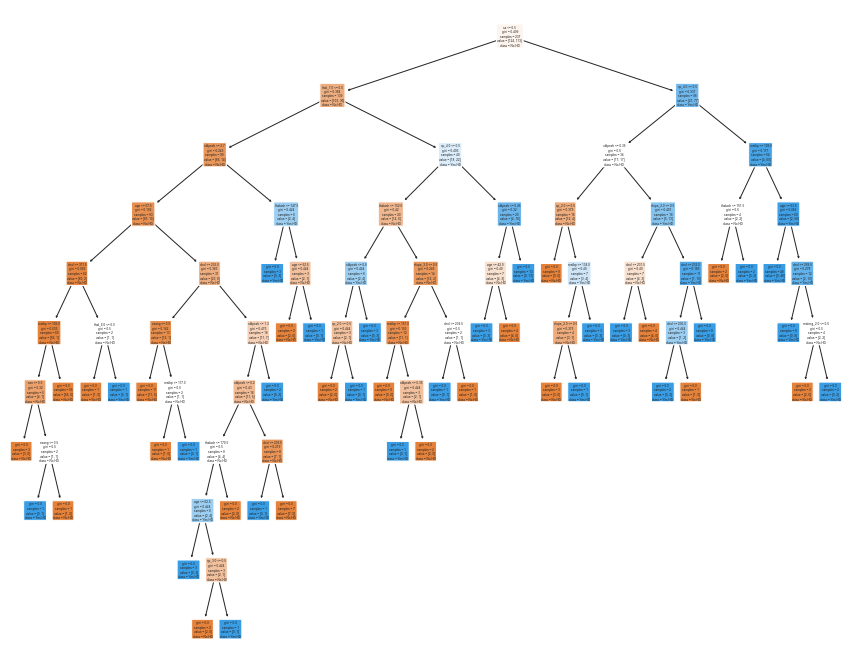

In [23]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["No HD", "Yes HD"], 
          feature_names=X.columns)

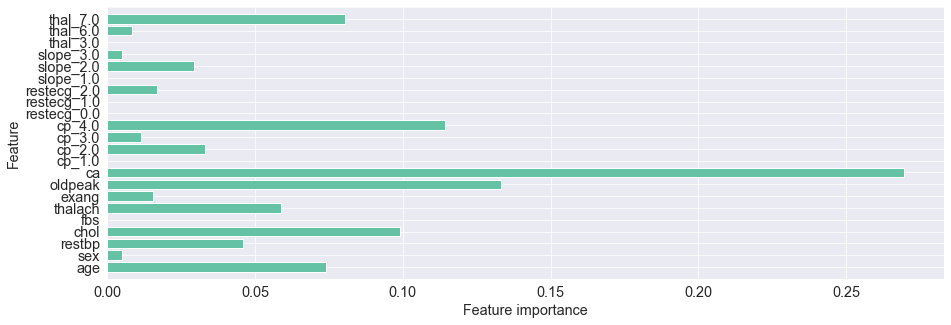

In [24]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_(clf_dt)

### 4. Model Evaluation  
<hr style="border:1px solid orange"> </hr>

In [25]:
y_pred = clf_dt.predict(X_test)

In [26]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [27]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8166666666666667

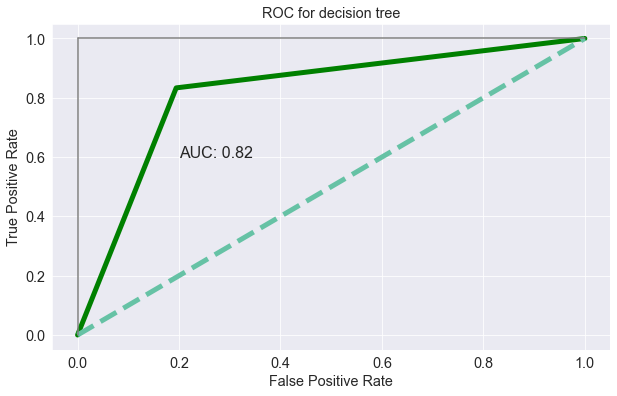

In [29]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8194444444444445

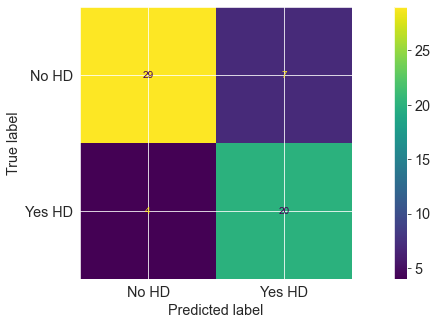

In [31]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['No HD', 'Yes HD'])

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        36
           1       0.74      0.83      0.78        24

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



## Cost Complexity Pruning - Part 1

Decision Trees are notorious for being overfit to the training dataset, and there are a lot of parameters, like max_depth and min_samples that are designed to reduce overfitting. 

Pruning a decision tree with cost complexity pruning can simplify the whole process of finding a smaller tree that improves the accuracy with the testing dataset. 

Pruning a decision tree is all about finding the right value for the pruning parameter, alpha, which controls how little or how much pruning happens. One way to find the optimal value for alpha is to plot the accuracy of the tree as a function of different values. This must be performed on both the training and testing datasets. 



**Definition:**

*ccp_alpha*: Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ``ccp_alpha`` is chosen.

ccp_alpha values: non-negative float, default=0.0

In [33]:
# Extracting the different values of alpha that are available for this tree and 
# Build a pruned tree for each value of ccp_alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree 
ccp_alphas = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value 

clf_dts = [] # Creating an array to store the created decision trees 

# For each value for alpha, create a decision tree and store it in the clf_dts array 
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

**Now, let's visualize the accuracy of the different trees using both the training and testing datasets**

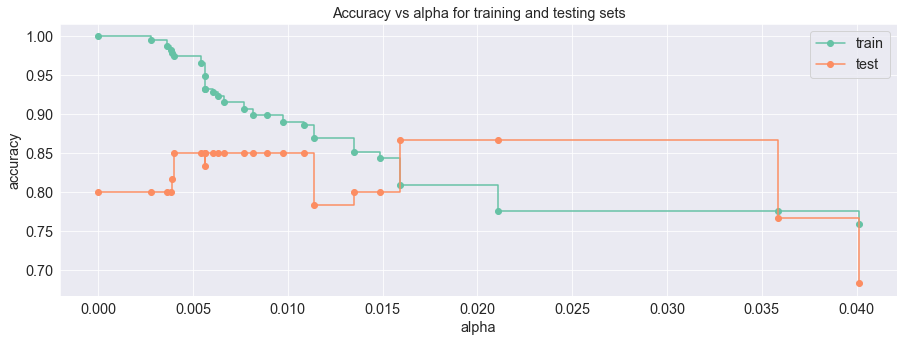

In [34]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the testing dataset hits its maximum value when alpha is about 0.016. After this value, the accuracy of the training dataset drops off and that suggests we should set $ccp\_alpha=0.016$

## Cost Complexity Pruning - Part 2

Since there are many ways we could divide the original dataset into training and testing datasets, **how do we know that we used the best training dataset? and how do we know that we used the best testing dataset?** 

Typically, the answer to this question is by using **10-Fold Cross Validation**. 

The previous part (Part 1) suggested one value for alpha, 0.016, but another set of data might suggest another optimal value for alpha. 

First, let's demonstrate that different training and testing datasets result in trees with different accuracies when we set **ccp_alpha=0.016**. We will do this by using the ***cross_val_score()*** function to generate different training and testing datasets, and then train and test the tree with these datasets. 

<AxesSubplot:xlabel='tree'>

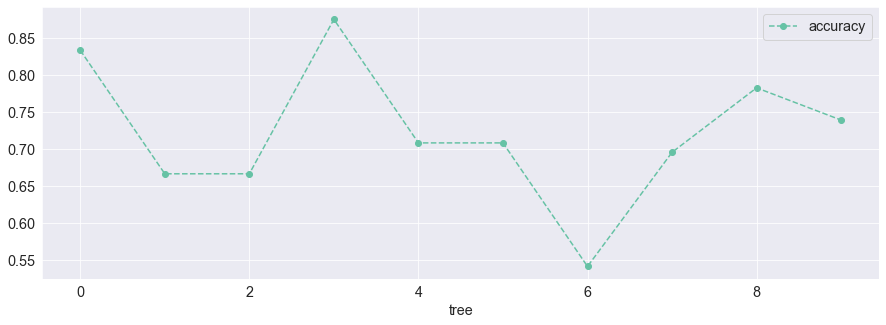

In [35]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

The graph above shows that using different training and testing datasets with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to the datasets. So, instead of picking a single training and single testing dataset, we can use cross validation to find the optimal value for alpha.

<AxesSubplot:xlabel='alpha'>

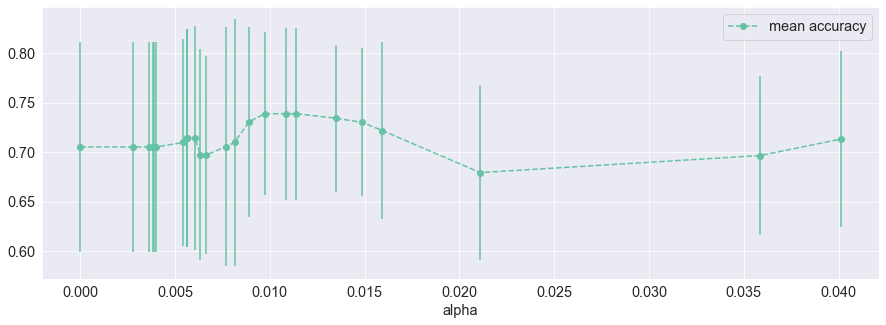

In [36]:
# Create a list to store the results of each fold during cross validation 
alpha_loop_values = []

# For each candidate value for alpha, we run 10-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy) 
# for each call cross_val_score in alpha_loop_values list

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)

In [37]:
alpha_results['mean accuracy'].max()

0.738768115942029

In [38]:
alpha_results['mean accuracy'].idxmax()

16

In [39]:
ideal_ccpa_alpha = alpha_results.iloc[alpha_results['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha

0.009724733775366687

In [40]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccpa_alpha)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(443.11764705882354, 597.96, 'ca <= 0.5\ngini = 0.499\nsamples = 237\nvalue = [124, 113]\nclass = No HD'),
 Text(196.94117647058823, 489.24, 'thal_7.0 <= 0.5\ngini = 0.384\nsamples = 139\nvalue = [103, 36]\nclass = No HD'),
 Text(98.47058823529412, 380.52000000000004, 'oldpeak <= 2.7\ngini = 0.243\nsamples = 99\nvalue = [85, 14]\nclass = No HD'),
 Text(49.23529411764706, 271.8, 'gini = 0.192\nsamples = 93\nvalue = [83, 10]\nclass = No HD'),
 Text(147.70588235294116, 271.8, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(295.4117647058823, 380.52000000000004, 'cp_4.0 <= 0.5\ngini = 0.495\nsamples = 40\nvalue = [18, 22]\nclass = Yes HD'),
 Text(246.1764705882353, 271.8, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(344.6470588235294, 271.8, 'oldpeak <= 0.45\ngini = 0.32\nsamples = 20\nvalue = [4, 16]\nclass = Yes HD'),
 Text(295.4117647058823, 163.07999999999998, 'age <= 42.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = No HD'),
 Text(

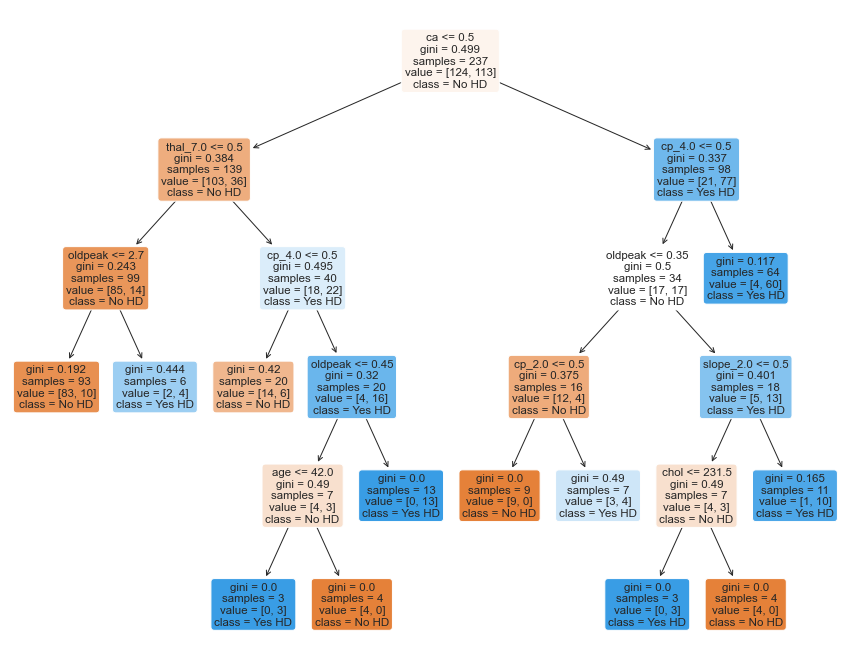

In [41]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["No HD", "Yes HD"], 
          feature_names=X.columns)

In [42]:
y_pred = clf_dt.predict(X_test)

In [43]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [44]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.85

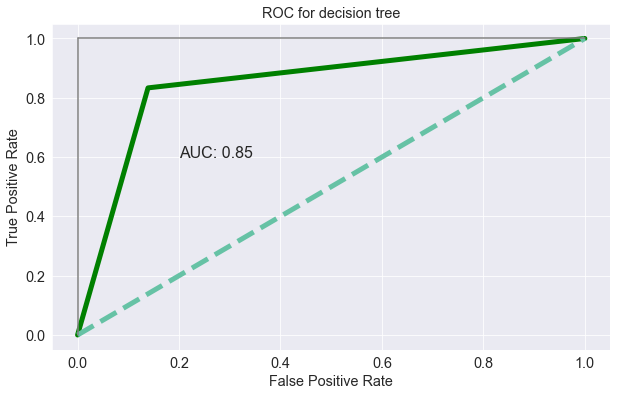

In [46]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8472222222222223

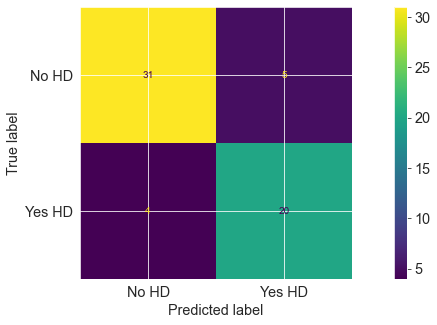

In [48]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['No HD', 'Yes HD'])

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.80      0.83      0.82        24

    accuracy                           0.85        60
   macro avg       0.84      0.85      0.84        60
weighted avg       0.85      0.85      0.85        60



<div class="alert alert-block alert-success">
    <h2 style="text-align: left">Classification Using Random Forests</h2>
</div>

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred = clf_rf.predict(X_test)

In [52]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [53]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8666666666666667

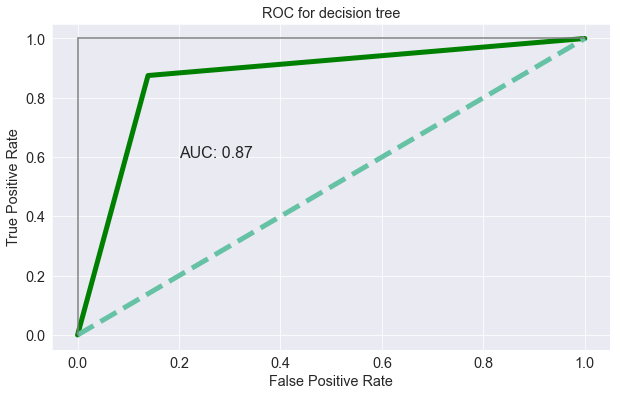

In [55]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [56]:
roc_auc_score(y_test, y_pred)

0.8680555555555556

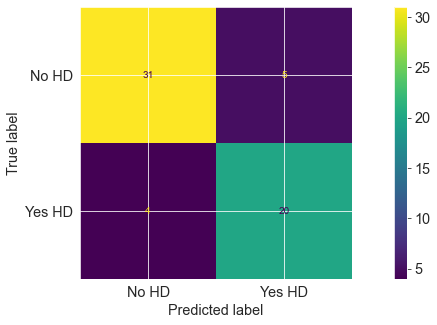

In [57]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['No HD', 'Yes HD'])

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60

